## Create a K-sparse vector s of Fourier coeficients in a fourier basis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})
from scipy.fftpack import dct, idct

In [5]:
n = 50
w = np.exp(-1j * 2 * np.pi / n)

J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
psi = dct(np.identity(n))


In [28]:
import random
K = 5
newArray = random.sample(range(n+1), 5)
newArray.sort()

randomVect = np.zeros(n, dtype = int)
s = np.asarray(randomVect)

for number in newArray:
    s[number]=1
    

Create a Gaussian random sampling matrix to creat measurement vector y = C*\phi*s

In [21]:
x = psi@randomVect

In [25]:
# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

from scipy.optimize import minimize
eps = 10

In [46]:
def Average(lst):
    return sum(lst) / len(lst)

error_L2_avg_list = []
error_L1_avg_list = []

p = 20
p_list = list(range(1,p+1))
for k in range(p):
    err_list_l2 = []
    err_list_l1 = []
    for i in range(1, 11):
        C = np.random.normal(0, 1, size=(k, n))
        Theta = C @ psi
        y = Theta @ s
        constr = ({'type': 'ineq', 'fun': lambda x:  eps - np.linalg.norm(Theta @ x - y1,2)})

        y1 = np.copy(y)

        x0 = np.linalg.pinv(Theta) @ y1
        res = minimize(L1_norm, x0, method = 'SLSQP', constraints = constr)
        s1 = res.x
        rel_err_l2 = np.linalg.norm(s - s1, 2 )/np.linalg.norm(s, 2)
        rel_err_l1 = np.linalg.norm(s - s1, 1 )/np.linalg.norm(s, 1)
        err_list_l2.append(rel_err_l2)
        err_list_l1.append(rel_err_l1)
    error_avg_l2 = Average(err_list_l2)
    error_avg_l1 = Average(err_list_l1)
    error_L2_avg_list.append(error_avg_l2)
    error_L1_avg_list.append(error_avg_l1)

In [41]:
print(error_L2_avg_list)

[1.0000000111758713, 1.0111034420800507, 1.0128695151240676, 1.0000796243981611, 0.9790875493651503, 0.9449376745789492, 0.9913974768505858, 0.9414239002009348, 0.9815140314292877, 0.9718095724833595, 0.806395755299292, 0.9184861716149791, 0.8400314848417345, 0.8825532712240864, 0.7198848634410966]


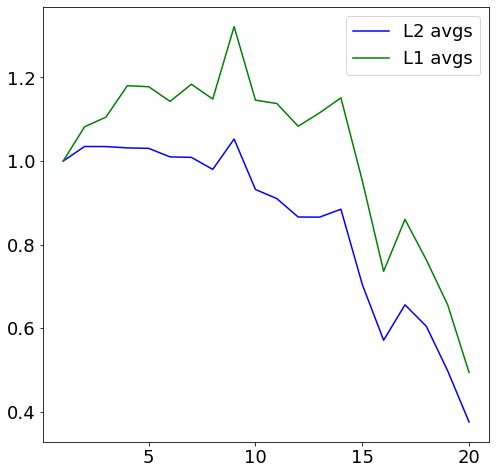

In [48]:
plt.figure()
plt.plot(p_list, error_L2_avg_list, color='b', label='L2 avgs')
plt.plot(p_list, error_L1_avg_list, color='g', label='L1 avgs')
#plt.plot(p_list, L0_avg, color='r', label='L0 avgs')
plt.legend()
plt.show()